# Yeni Bölüm

VERİ MADENCİLİĞİ VİZE

SORU 1:
Aşağıdaki kod parçası üretilen 1000 örneği k-means kümeleme yöntemi ile kümeleyiniz.

>from sklearn import datasets
import numpy as np
X, y = datasets.make_blobs(n_samples=1000, centers=4,
cluster_std=[np.random.rand()*2, np.random.rand()*2,
np.random.rand()*2, np.random.rand()*2])

*   Geliştirdiğiniz programda en optimal küme sayısını (k) otomatik hesaplansın.
Programın arkasındaki mantığı detaylıca açıklayınız.
*   Yukarıda çözümünüzün devamında girdi olarak bir nokta kabul eden program
yazınız. Program bu noktayı sınıflardan birine veya gerektiğinde ise bir anomali
olarak (yani hiç bir sınıfa ait olmayan) sınıflandırmalıdır. Arkasındaki mantığı
detaylıca açıklayınız.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.cluster import KMeans

In [ ]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1000, centers=4,
cluster_std=[np.random.rand()*2, np.random.rand()*2,
np.random.rand()*2, np.random.rand()*2])

Bu kod kullanılarak make_blobs fonksiyonunyla 1000 örnek oluşturur. Bu örnekler, 4 farklı merkeze ve belirli bir standart sapmaya sahip rasgele verilerden oluşur.

In [ ]:
# Veri setini DataFrame'e dönüştürme
data = {'Feature_1': X[:, 0], 'Feature_2': X[:, 1], 'Label': y}
df = pd.DataFrame(data)
print(df)

     Feature_1  Feature_2  Label
0    -5.575705  -4.371711      1
1     8.551318   1.653319      3
2     5.831439  -5.211199      0
3    -2.252943  -3.439814      2
4     4.846332  -5.378027      0
..         ...        ...    ...
995   8.913572  -6.669849      0
996  -5.294589  -3.478012      1
997   1.008354  -1.121809      2
998  -1.928507  -3.508971      2
999  -4.900013  -4.818066      1

[1000 rows x 3 columns]


In [ ]:
# Genel Exploration for Dataset
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))

In [ ]:
check_df(df)

##################### Shape #####################
(1000, 3)
##################### Types #####################
Feature_1    float64
Feature_2    float64
Label          int64
dtype: object
##################### Head #####################
   Feature_1  Feature_2  Label
0  -5.575705  -4.371711      1
1   8.551318   1.653319      3
2   5.831439  -5.211199      0
3  -2.252943  -3.439814      2
4   4.846332  -5.378027      0
##################### Tail #####################
     Feature_1  Feature_2  Label
995   8.913572  -6.669849      0
996  -5.294589  -3.478012      1
997   1.008354  -1.121809      2
998  -1.928507  -3.508971      2
999  -4.900013  -4.818066      1


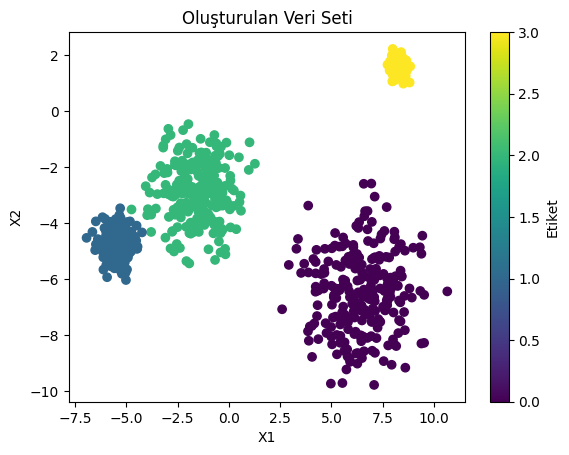

In [ ]:
# Veriyi görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Oluşturulan Veri Seti')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Etiket')
plt.show()

Küme sayısının belirlenmesi için kullanılabilecek pek çok yöntem mevcuttur. Bu yöntemlerden 4 tanesini kullanarak bir belirleme yaptım.

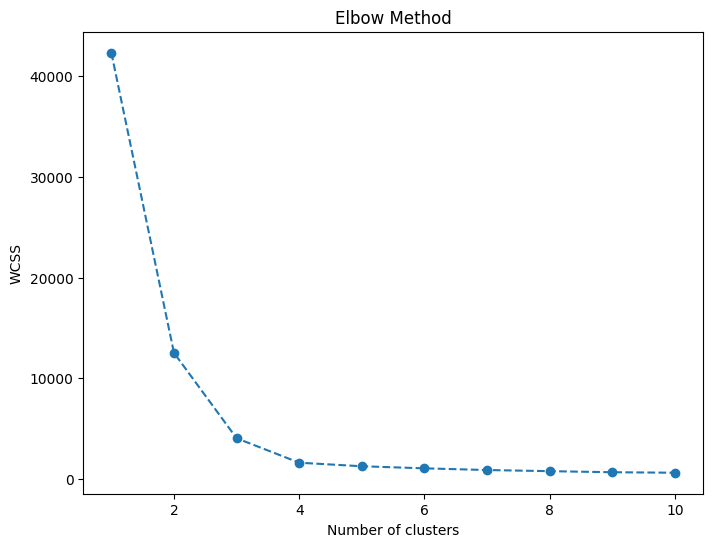

In [ ]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Feature_1', 'Feature_2']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

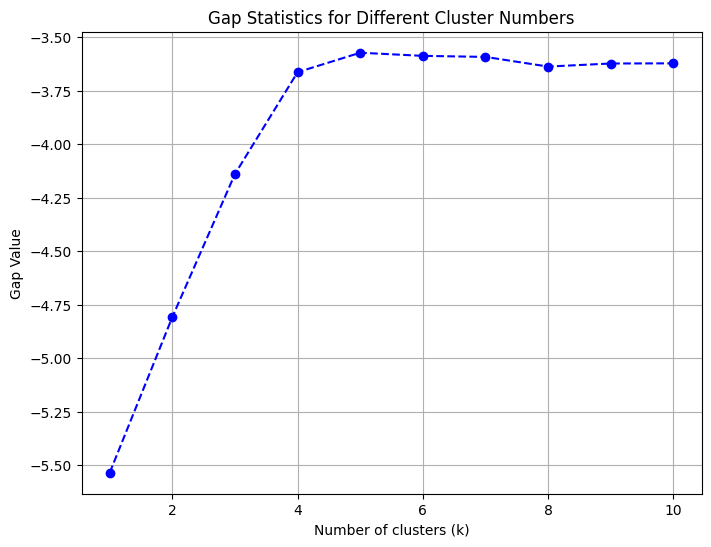

Gap istatistiği değerleri: [-5.53520606571839, -4.808063964132455, -4.139685722455987, -3.6639585060336417, -3.5730139634871962, -3.5877095768938414, -3.592522641132933, -3.6377407393713925, -3.6233779157485, -3.6226482283609904]


In [ ]:
def calculate_gap(data):
    gaps = []
    for k in range(1, 11):  # Küme sayısını 1 ile 10 arasında değerlendiriyoruz
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        gap = compute_gap(kmeans, data, k)
        gaps.append(gap)
    return gaps

def compute_gap(kmeans, data, k):
    # Hesaplama yapılacak kümeleme sonuçlarını elde ediyoruz
    cluster_dispersion = kmeans.inertia_

    # Rasgele veri oluşturup k-means ile kümeleme yaparak beklenen dağılımı hesaplıyoruz
    reference_dispersion = []
    for i in range(5):  # Rasgele 5 defa k-means işlemi uygulayarak beklenen dağılımı hesaplıyoruz
        random_data = np.random.random_sample(size=data.shape)  # Rasgele veri oluşturuyoruz
        random_kmeans = KMeans(n_clusters=k)
        random_kmeans.fit(random_data)
        reference_dispersion.append(random_kmeans.inertia_)

    # Beklenen dağılımın ortalamasını alıyoruz
    reference_dispersion_mean = np.mean(reference_dispersion)

    # Gap istatistiğini hesaplıyoruz
    gap = np.log(reference_dispersion_mean) - np.log(cluster_dispersion)
    return gap


gap_values = calculate_gap(df[['Feature_1', 'Feature_2']])
# Gap istatistiğini grafik olarak göster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), gap_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Value')
plt.title('Gap Statistics for Different Cluster Numbers')
plt.grid(True)
plt.show()

print("Gap istatistiği değerleri:", gap_values)


For n_clusters = 2 The average silhouette_score is : 0.6422283504373048
For n_clusters = 3 The average silhouette_score is : 0.769142673602248
For n_clusters = 4 The average silhouette_score is : 0.7666526932927155
For n_clusters = 5 The average silhouette_score is : 0.6764720776611876
For n_clusters = 6 The average silhouette_score is : 0.6812361624459682
For n_clusters = 7 The average silhouette_score is : 0.6106791613412095
For n_clusters = 8 The average silhouette_score is : 0.6037171561518866
For n_clusters = 9 The average silhouette_score is : 0.609551147717342
For n_clusters = 10 The average silhouette_score is : 0.5972722336117842
For n_clusters = 11 The average silhouette_score is : 0.6046324939569658
For n_clusters = 12 The average silhouette_score is : 0.5939577490125497
For n_clusters = 13 The average silhouette_score is : 0.4801377283830094
For n_clusters = 14 The average silhouette_score is : 0.47565614185834953
For n_clusters = 15 The average silhouette_score is : 0.4709

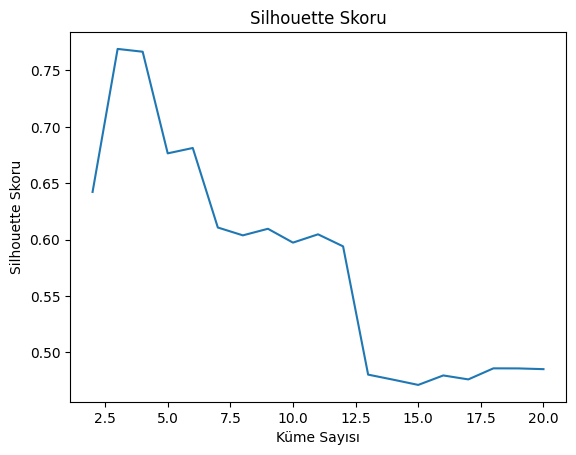

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette Skoru hesaplama
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    silhouette_scores.append(silhouette_avg)

# Silhouette Skoru grafiği
plt.plot(range(2, 21), silhouette_scores)
plt.title('Silhouette Skoru')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')

# En iyi performansı gösteren küme sayısını bulma
best_n_clusters_silhouette  = silhouette_scores.index(max(silhouette_scores)) + 2  # En iyi skorun indeksi + 2
print(f"En iyi küme sayısı: {best_n_clusters_silhouette }")

En uygun küme sayısı: 4


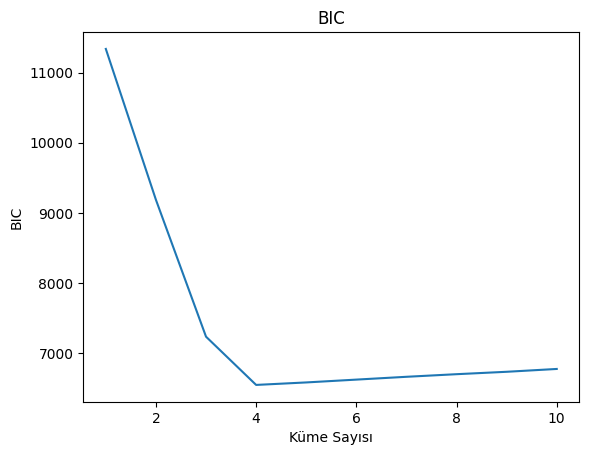

In [ ]:
# GMM modeli oluşturma ve BIC değerini hesaplama
from sklearn.mixture import GaussianMixture
import numpy as np

# Veri seti için BIC değerlerini saklayacak bir liste
bic_values = []  # BIC: Bayesian Information Criterion -Bayes Bilgi Kriteri

# Farklı küme sayıları için GMM modeli oluşturma ve BIC değerlerini hesaplama
for n_components in range(1, 11):  # 1 ile 10 arasında küme sayısı
    gmm = GaussianMixture(n_components=n_components, random_state=0)  # GMM modeli oluşturma
    gmm.fit(df[['Feature_1', 'Feature_2']])  # BIC değerini hesaplama
    bic_values.append(gmm.bic(df[['Feature_1', 'Feature_2']]))  # BIC değerini saklama

# BIC grafiği
plt.plot(range(1, 11), bic_values)
plt.title('BIC')
plt.xlabel('Küme Sayısı')
plt.ylabel('BIC')

# En düşük BIC değerine sahip olan küme sayısını belirleme
best_n_components = np.argmin(bic_values) + 1  # +1 çünkü range 1'den başlıyor
print(f"En uygun küme sayısı: {best_n_components}")  # En düşük BIC değerine sahip olan küme sayısı

In [ ]:
# Determine the final number of clusters
if best_n_clusters_silhouette >= best_n_components:
    k = best_n_clusters_silhouette
else:
    k = best_n_components

print(f"Optimal küme sayısı (k): {k}")

Optimal küme sayısı (k): 4


In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np

# KMeans ve GMM modellerini oluşturma
kmeans = KMeans(n_clusters=k, random_state=0)
gmm = GaussianMixture(n_components=k, random_state=0)

# Veri setini belirlenen k değeriyle kümeleme
kmeans_clusters = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])
gmm_clusters = gmm.fit_predict(df[['Feature_1', 'Feature_2']])

# Anormal sınıfın etiketini başlangıçta -1 olarak atıyoruz
anomalous_class_label = -1

# Her bir veri noktası için küme etiketlerini kontrol ederek anormal sınıfı belirleme
anomalous_points = []  # Anormal sınıfın etiketini belirlemek için kullanılacak veri noktaları
for i in range(len(df)):  # Her bir veri noktasını kontrol etme
    if kmeans_clusters[i] == -1 or gmm_clusters[i] == -1:  # Eğer biri ya da her ikisi de -1 (anormal sınıf) ise
        anomalous_points.append(i)  # Anormal sınıfın etiketini belirlemek için kullanılacak veri noktalarını saklama

# Anormal sınıfın etiketini belirliyoruz
for idx in anomalous_points:  # Anormal sınıfın etiketini belirlemek için kullanılacak veri noktalarını kontrol etme
    kmeans_clusters[idx] = anomalous_class_label  # KMeans küme etiketini anormal sınıf etiketi ile değiştiriyoruz
    gmm_clusters[idx] = anomalous_class_label  # GMM küme etiketini anormal sınıf etiketi ile değiştiriyoruz

# Her bir veri noktasının küme etiketlerini ekrana yazdırma
for i in range(len(df)):  # Her bir veri noktasını kontrol etme
    print(f"Data point {i} - KMeans Cluster: {kmeans_clusters[i]}, GMM Cluster: {gmm_clusters[i]}")  # Her bir veri noktasının küme etiketlerini ekrana yazdırma

# Anormal sınıfı ekrana yazdırma
print(f"Anomalous Class Label: {anomalous_class_label}")

Data point 0 - KMeans Cluster: 3, GMM Cluster: 3
Data point 1 - KMeans Cluster: 0, GMM Cluster: 1
Data point 2 - KMeans Cluster: 2, GMM Cluster: 2
Data point 3 - KMeans Cluster: 1, GMM Cluster: 0
Data point 4 - KMeans Cluster: 2, GMM Cluster: 2
Data point 5 - KMeans Cluster: 2, GMM Cluster: 2
Data point 6 - KMeans Cluster: 0, GMM Cluster: 1
Data point 7 - KMeans Cluster: 1, GMM Cluster: 0
Data point 8 - KMeans Cluster: 3, GMM Cluster: 3
Data point 9 - KMeans Cluster: 3, GMM Cluster: 0
Data point 10 - KMeans Cluster: 2, GMM Cluster: 2
Data point 11 - KMeans Cluster: 1, GMM Cluster: 0
Data point 12 - KMeans Cluster: 2, GMM Cluster: 2
Data point 13 - KMeans Cluster: 1, GMM Cluster: 0
Data point 14 - KMeans Cluster: 2, GMM Cluster: 2
Data point 15 - KMeans Cluster: 3, GMM Cluster: 3
Data point 16 - KMeans Cluster: 1, GMM Cluster: 0
Data point 17 - KMeans Cluster: 0, GMM Cluster: 1
Data point 18 - KMeans Cluster: 2, GMM Cluster: 2
Data point 19 - KMeans Cluster: 0, GMM Cluster: 1
Data point

SORU 2:
*   1 sorudaki verisetini hiyerarşik kümeleme ile çözünüz. K-means ile elde ettiğiniz sonuca en yakın sonucu elde etmek için hangi bağlantıyı kullanabiliriz.
*   Hiyerarşik kümeleme yapıldıktan sonra optimal küme sayısını (k) otomatik
hesaplayan bir fonksiyon geliştirin. Arkasındaki mantığı detaylıca açıklayınız.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# KMeans ve GMM modellerini oluşturma
kmeans = KMeans(n_clusters=k, random_state=0)
gmm = GaussianMixture(n_components=k, random_state=0)

# Veri setini belirlenen k değeriyle kümeleme
kmeans_clusters = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])
gmm_clusters = gmm.fit_predict(df[['Feature_1', 'Feature_2']])

# KMeans ve GMM'den gelen küme etiketlerini kullanarak hiyerarşik kümeleme yapma
# Bağlantı metodu olarak 'ward' kullanılabilir, ancak farklı bağlantı yöntemlerini de deneyebilirsiniz (örneğin, 'single', 'complete', 'average')
agg_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
agg_clusters = agg_cluster.fit_predict(df[['Feature_1', 'Feature_2']])

# Her bir veri noktasının küme etiketlerini ekrana yazdırma
for i in range(len(df)):
    print(f"Data point {i} - KMeans Cluster: {kmeans_clusters[i]}, GMM Cluster: {gmm_clusters[i]}, Agglomerative Cluster: {agg_clusters[i]}")

Data point 0 - KMeans Cluster: 3, GMM Cluster: 3, Agglomerative Cluster: 3
Data point 1 - KMeans Cluster: 0, GMM Cluster: 1, Agglomerative Cluster: 2
Data point 2 - KMeans Cluster: 2, GMM Cluster: 2, Agglomerative Cluster: 0
Data point 3 - KMeans Cluster: 1, GMM Cluster: 0, Agglomerative Cluster: 1
Data point 4 - KMeans Cluster: 2, GMM Cluster: 2, Agglomerative Cluster: 0
Data point 5 - KMeans Cluster: 2, GMM Cluster: 2, Agglomerative Cluster: 0
Data point 6 - KMeans Cluster: 0, GMM Cluster: 1, Agglomerative Cluster: 2
Data point 7 - KMeans Cluster: 1, GMM Cluster: 0, Agglomerative Cluster: 1
Data point 8 - KMeans Cluster: 3, GMM Cluster: 3, Agglomerative Cluster: 3
Data point 9 - KMeans Cluster: 3, GMM Cluster: 0, Agglomerative Cluster: 1
Data point 10 - KMeans Cluster: 2, GMM Cluster: 2, Agglomerative Cluster: 0
Data point 11 - KMeans Cluster: 1, GMM Cluster: 0, Agglomerative Cluster: 1
Data point 12 - KMeans Cluster: 2, GMM Cluster: 2, Agglomerative Cluster: 0
Data point 13 - KMeans

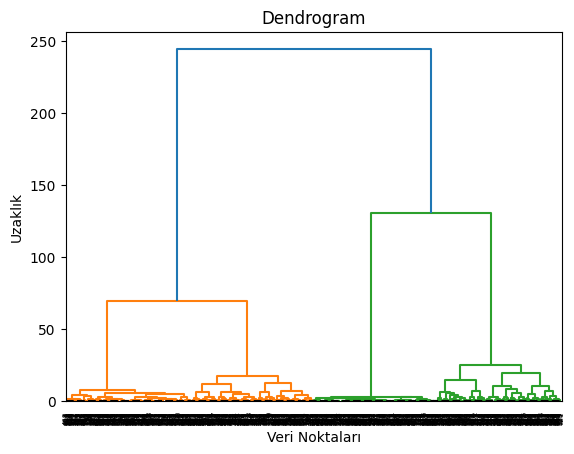

Optimal Küme Sayısı: 2


In [ ]:
import scipy.cluster.hierarchy as sch

def optimal_cluster_count(df):
    # Dendrogram oluşturma
    dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

    # Kesme seviyesinin belirlenmesi
    threshold_distance = 0.7 * max(dendrogram['dcoord'][1])  # Örnek bir eşik değeri (0.7 oranında maksimum mesafe)

    # Kesme seviyesini görsel olarak belirleme
    plt.axhline(y=threshold_distance, color='black', linestyle='--')
    plt.title('Dendrogram')
    plt.xlabel('Veri Noktaları')
    plt.ylabel('Uzaklık')
    plt.show()

    # Kesme seviyesindeki küme sayısını belirleme
    optimal_clusters = sum(d > threshold_distance for d in dendrogram['dcoord'][1])

    return optimal_clusters

# Veri setini kullanarak optimal küme sayısını hesaplama
optimal_k = optimal_cluster_count(df[['Feature_1', 'Feature_2']])
print(f"Optimal Küme Sayısı: {optimal_k}")

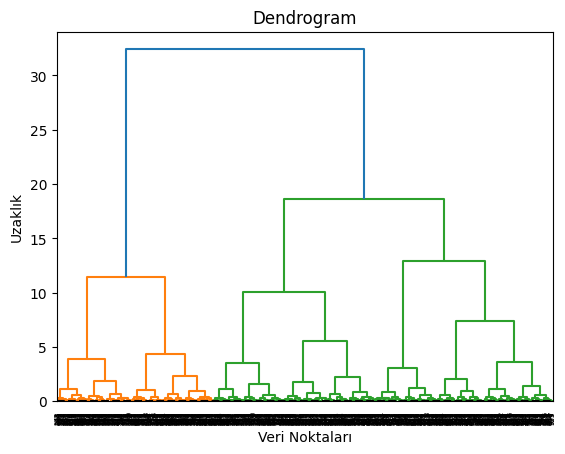

Optimal Küme Sayısı: 2


In [ ]:
# Dendrogram oluşturma
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Kesme seviyesinin belirlenmesi
threshold_distance = 0.7 * max(dendrogram['dcoord'][1])  # Örnek bir eşik değeri (0.7 oranında maksimum mesafe)

# Kesme seviyesini görsel olarak belirleme
plt.axhline(y=threshold_distance, color='black', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklık')
plt.show()

# Kesme seviyesindeki küme sayısını belirleme
optimal_clusters = sum(d > threshold_distance for d in dendrogram['dcoord'][1])

print(f"Optimal Küme Sayısı: {optimal_clusters}")

SORU 3: Eğer veriseti aşağıdaki gibi olsaydı hangi hiyerarşik kümeleme için bağlantıyı kullanırdınız. Kümelemeyi gerçekleştirin ve çözümünüzün arkasındaki mantığı detaylıca açıklayınız.Bir öncekisoruda oluşturduğunuz otomatik küme sayısı hesaplama fonksiyonu bu verisetinde dedoğru sonu çüretiyor mu?açıklayınız.

> from sklearn import datasets import numpy as np X,y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=np.random.randint(80))




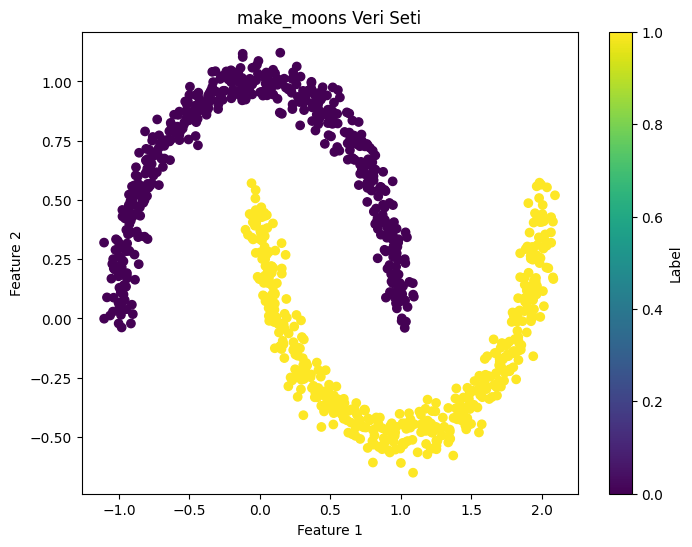

In [ ]:
# Veri setini oluşturma
X, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=np.random.randint(80))

# Veri setini görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('make_moons Veri Seti')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Label')
plt.show()

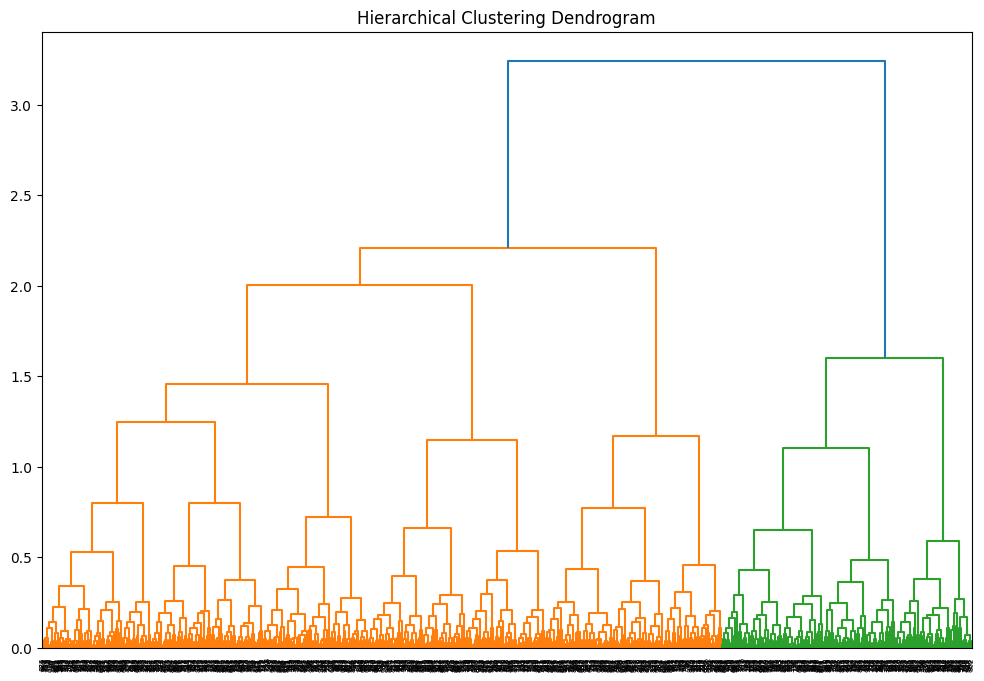

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# Hierarchical clustering için dendrogram oluştur
linked = linkage(X, 'complete')  # veya 'average' olarak değiştirilebilir
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Kümeleme için 'complete' bağlantı yöntemiyle AgglomerativeClustering kullanma
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='complete')  # veya 'average' olarak değiştirilebilir
cluster_labels = hierarchical.fit_predict(X)

SORU 4:

> Aşağıdaki kod parçası ile oluşturulan veri setini temel bileşenler analizi ile 2 boyuta indirgeyiniz. from sklearn import datasets, manifold import numpy as np n_samples=1500 S_points,S_color= datasets.make_s_curve(n_samples, random_state=0)

1.   Temel bileşenler analizini hazır kütüphane fonksiyonları kullanmadan yapınız. (numpy kullanılabilir)Tüm adımları ve sonuçları yorumlayınız.
2.   Aynı veriseti üzerinde noktaların bir birine olan uzaklığından oluşan yeni bir veriseti oluşturun.Bu yeni ver setini temel bileşenler analizi ile 2 boyuta hazır kütüphane fonksiyonları kullanmadan(numpykullanılabilir) indirgeyin.Tüm adımları ve sonuçları yorumlayınız.

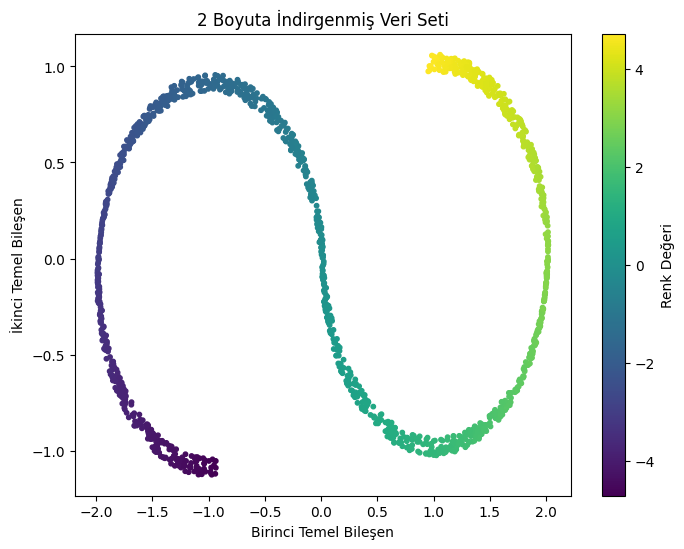

In [ ]:
from sklearn.datasets import make_s_curve
import numpy as np
import matplotlib.pyplot as plt

# Veri setini oluşturma
n_samples = 1500
S_points, S_color = make_s_curve(n_samples, random_state=0)

# Veriyi 2 boyuta indirgeme işlemi
def custom_pca(data, num_components=2):
    # Veri setinin ortalamasını çıkar
    mean_values = np.mean(data, axis=0)
    centered_data = data - mean_values

    # Kovaryans matrisini hesapla
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Kovaryans matrisinin özdeğerleri ve özvektörlerini hesapla
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Özdeğerleri büyüklüklerine göre sırala ve sadece ilk num_components'ı seç
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigen_indices = sorted_indices[:num_components]
    top_eigenvalues = eigenvalues[top_eigen_indices]
    top_eigenvectors = eigenvectors[:, top_eigen_indices]

    # Veriyi yeni uzayda dönüştürme
    transformed_data = np.dot(centered_data, top_eigenvectors)

    return transformed_data

# Veriyi 2 boyuta indirgeme
reduced_data = custom_pca(S_points, num_components=2)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=S_color, cmap='viridis', s=10)
plt.title('2 Boyuta İndirgenmiş Veri Seti')
plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.colorbar(label='Renk Değeri')
plt.show()

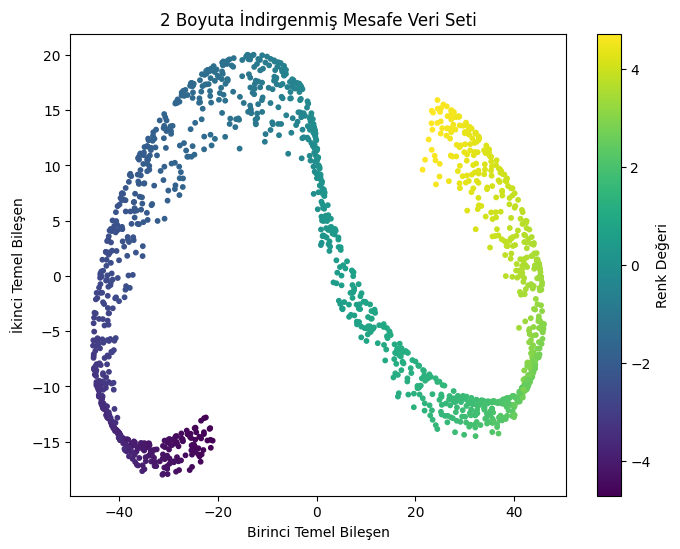

In [ ]:
from sklearn.datasets import make_s_curve
import numpy as np
import matplotlib.pyplot as plt

# Veri setini oluşturma
n_samples = 1500
S_points, S_color = make_s_curve(n_samples, random_state=0)

# Noktalar arasındaki uzaklıkları hesaplama
distance_matrix = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        distance_matrix[i, j] = np.linalg.norm(S_points[i] - S_points[j])

# Temel Bileşen Analizi (PCA) işlemi
def custom_pca(data, num_components=2):
    # Veriyi ortalama değeriyle merkezleme
    mean_values = np.mean(data, axis=0)
    centered_data = data - mean_values

    # Kovaryans matrisini hesaplama
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Kovaryans matrisinin özdeğerleri ve özvektörlerini hesaplama
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Özdeğerleri büyüklüklerine göre sıralama ve ilk num_components'ı seçme
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigen_indices = sorted_indices[:num_components]
    top_eigenvalues = eigenvalues[top_eigen_indices]
    top_eigenvectors = eigenvectors[:, top_eigen_indices]

    # Veriyi yeni uzayda dönüştürme
    transformed_data = np.dot(centered_data, top_eigenvectors)

    return transformed_data

# Mesafe matrisi üzerinden PCA işlemi
reduced_data = custom_pca(distance_matrix, num_components=2)

# Sonuçları görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=S_color, cmap='viridis', s=10)
plt.title('2 Boyuta İndirgenmiş Mesafe Veri Seti')
plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.colorbar(label='Renk Değeri')
plt.show()


**SORU** 5: 4. sorunun başındaki veri setini bir de LLE yöntemi ile 2 boyuta indirgeyin.Burada yakın komşular parametresini az veya çok seçtiğimizde sonuçların nasıl değiştiğiniz gösteriniz ve yorumlayınız.

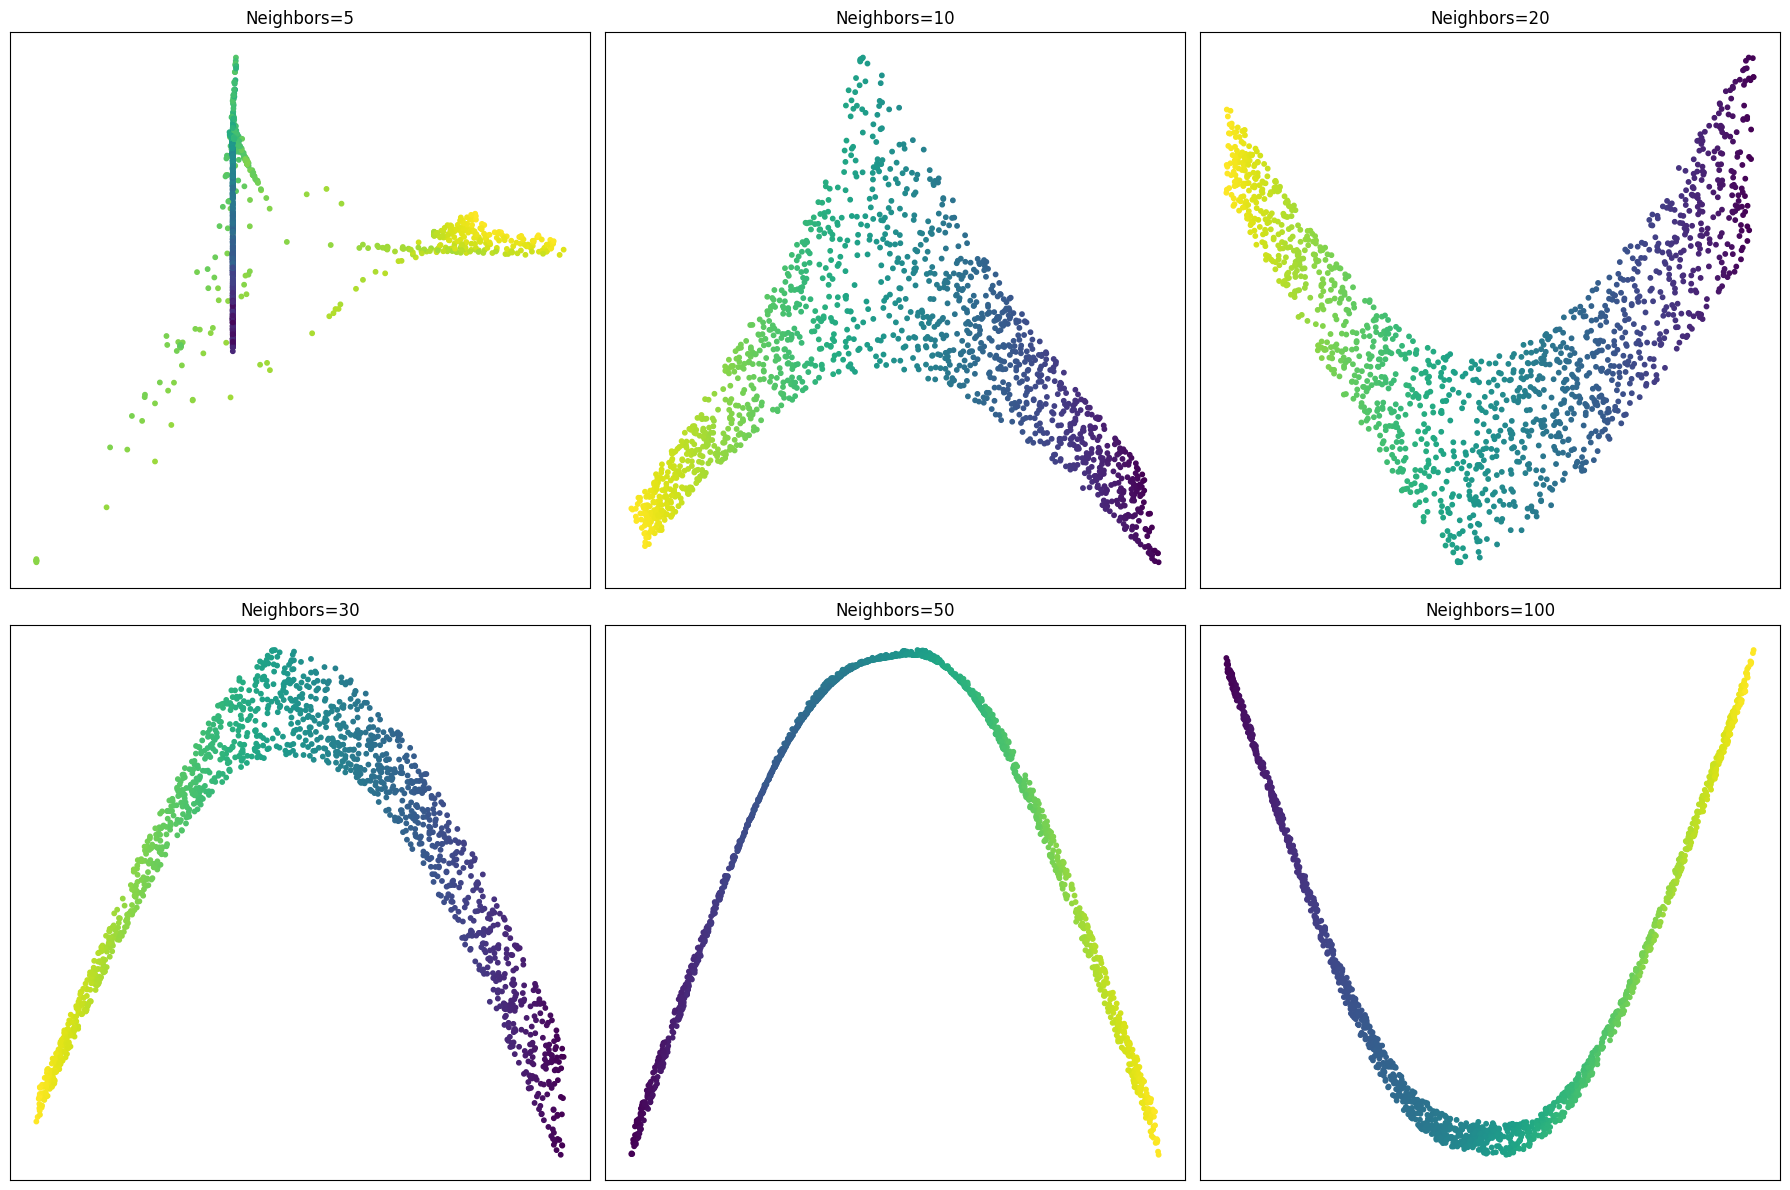

In [ ]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Veri setini oluşturma
n_samples = 1500
S_points, S_color = make_s_curve(n_samples, random_state=0)

# Farklı komşu sayıları için LLE işlemi ve görselleştirme
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, neighbors in enumerate([5, 10, 20, 30, 50, 100]):
    lle = LocallyLinearEmbedding(n_neighbors=neighbors, n_components=2, method='standard')
    reduced_data = lle.fit_transform(S_points)

    row = i // 3
    col = i % 3
    axs[row, col].scatter(reduced_data[:, 0], reduced_data[:, 1], c=S_color, cmap='viridis', s=10)
    axs[row, col].set_title(f'Neighbors={neighbors}')
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Veri setini oluşturma (örneğin)
# (S_points isimli değişken bu veri setini içeriyor olsun)

# PCA ile veriyi 2 boyuta indirgeme
pca = PCA(n_components=2)
S_2d = pca.fit_transform(S_points)

# Indirgenmiş uzaydaki noktalar arasındaki Euclidean uzaklıkları hesaplama
distances = np.linalg.norm(S_2d[:, np.newaxis] - S_2d, axis=-1)

# En uzak iki noktayı bulma
max_distance_indices = np.unravel_index(np.argmax(distances), distances.shape)
max_distance_points = S_2d[max_distance_indices[0]], S_2d[max_distance_indices[1]]
max_distance_value = distances[max_distance_indices]

print(f"En Uzak İki Nokta: {max_distance_points}")
print(f"En Uzaklık: {max_distance_value}")

En Uzak İki Nokta: (array([-1.98761874,  0.22027429]), array([ 2.0154311 , -0.17112548]))
En Uzaklık: 4.022138962703249


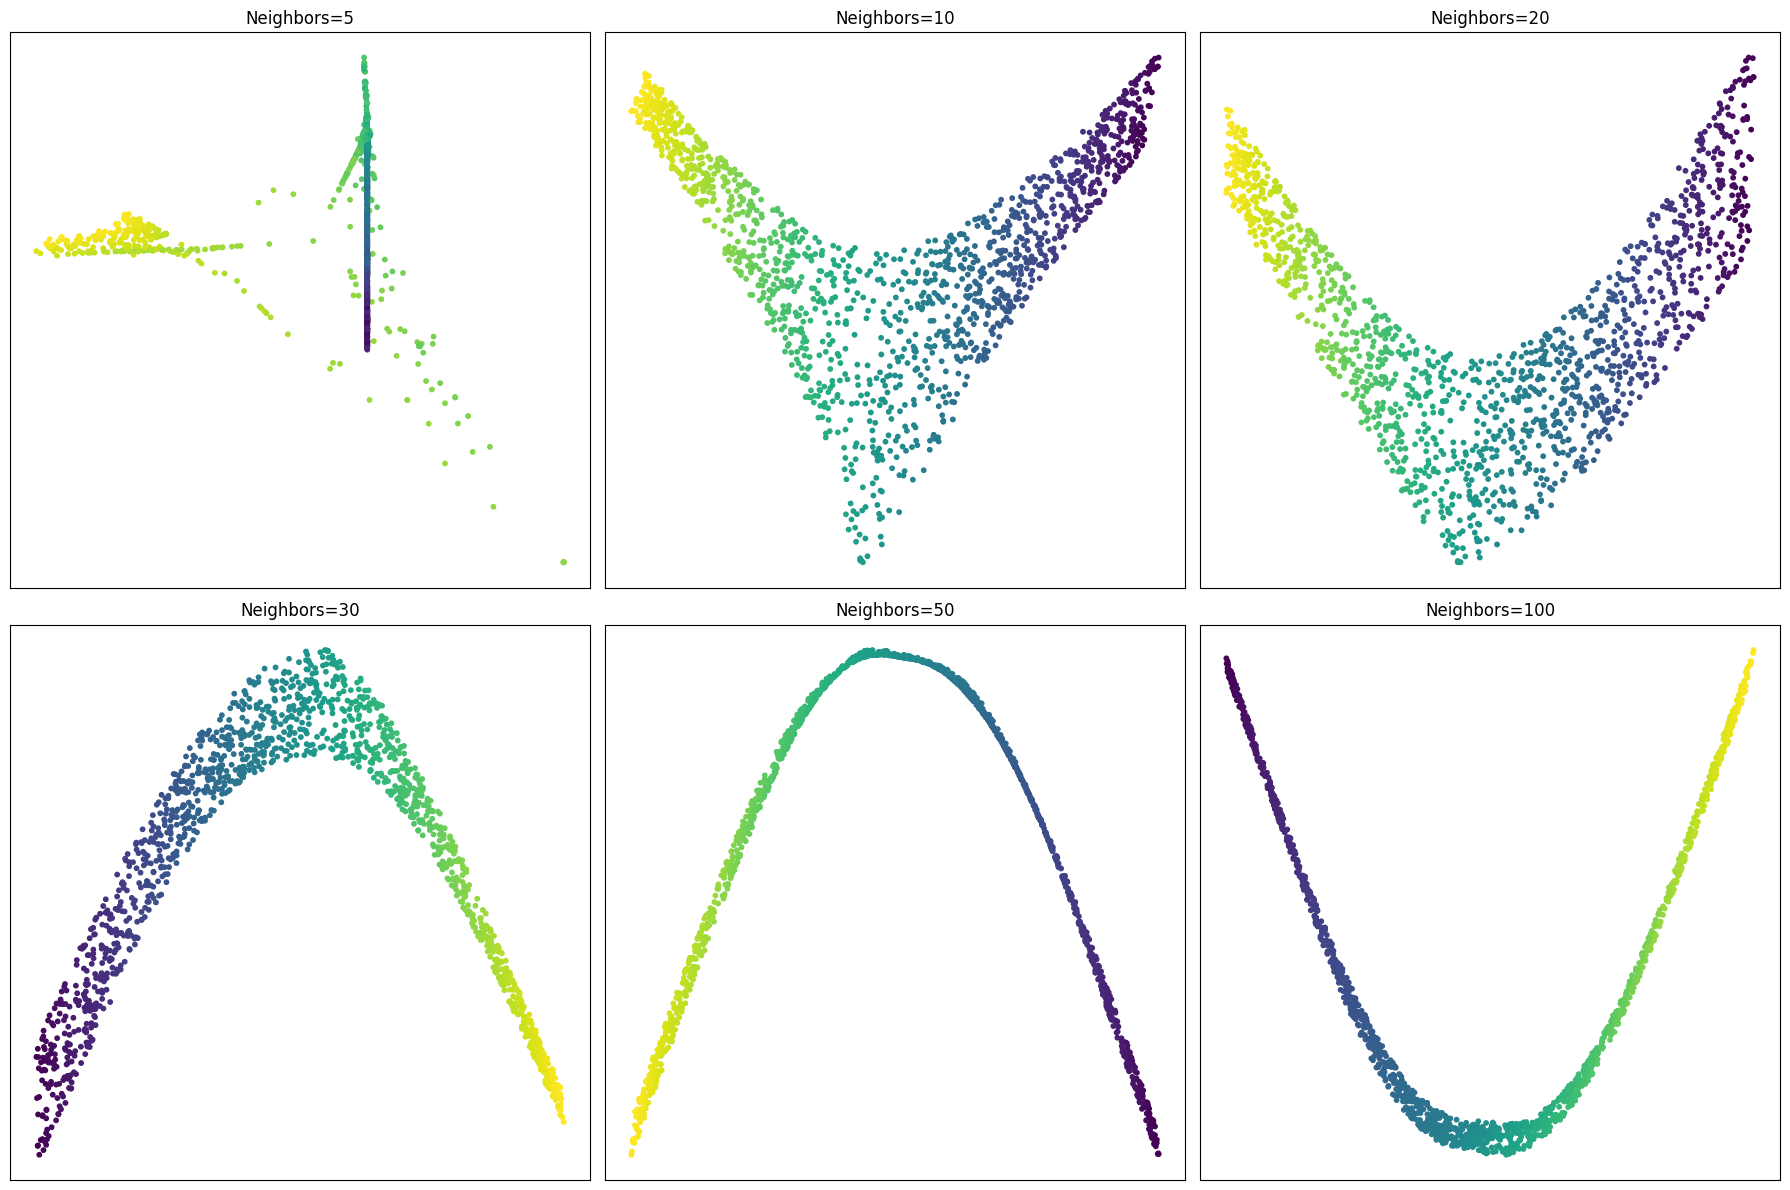

En büyük uzaklık: 0.09727119306011321
En uzak iki nokta: [-0.00764924 -0.02904664], [0.04518179 0.05262691]
Yeni nokta geometrik şeklin içinde veya üzerinde mi: False


In [ ]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np
import matplotlib.pyplot as plt

# Veri setini oluşturma
n_samples = 1500
S_points, S_color = make_s_curve(n_samples, random_state=0)

# Farklı komşu sayıları için LLE işlemi ve görselleştirme
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, neighbors in enumerate([5, 10, 20, 30, 50, 100]):
    lle = LocallyLinearEmbedding(n_neighbors=neighbors, n_components=2, method='standard')
    reduced_data = lle.fit_transform(S_points)

    row = i // 3
    col = i % 3
    axs[row, col].scatter(reduced_data[:, 0], reduced_data[:, 1], c=S_color, cmap='viridis', s=10)
    axs[row, col].set_title(f'Neighbors={neighbors}')
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])

plt.tight_layout()
plt.show()

# En büyük uzaklığı ve iki noktayı hesaplama
max_distance = 0
point_1 = None
point_2 = None

for i in range(len(reduced_data)):
    for j in range(i + 1, len(reduced_data)):
        distance = np.linalg.norm(reduced_data[i] - reduced_data[j])
        if distance > max_distance:
            max_distance = distance
            point_1 = reduced_data[i]
            point_2 = reduced_data[j]

print(f"En büyük uzaklık: {max_distance}")
print(f"En uzak iki nokta: {point_1}, {point_2}")

# Şeklin içinde veya üzerinde mi kontrol etme işlemi
def check_point_in_shape(new_point):
    # Yeni noktanın bu geometrik şekil üzerinde veya içinde olup olmadığını kontrol etme
    distances_to_shape = np.linalg.norm(reduced_data - new_point, axis=1)
    min_distance_to_shape = np.min(distances_to_shape)
    if min_distance_to_shape <= max_distance:
        return True
    else:
        return False

# Örnek bir nokta belirleme ve kontrol etme
new_point = np.array([0.5, 0.5])  # Yeni bir nokta (örnek olarak)
result = check_point_in_shape(new_point)
print(f"Yeni nokta geometrik şeklin içinde veya üzerinde mi: {result}")
